In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pprint import pprint

import requests

from bs4 import BeautifulSoup

import json
import time
import copy
from collections import Counter
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
#loop 3: improve model with SnowBall stemming and ngram_range(1,2). Perform EDA with roc curve

In [2]:
corpus = pd.read_csv("data/booksummaries/summaries&genres.csv")
corpus['Summary'] = corpus['Summary'].str.lower()
corpus;

In [3]:
y = corpus['scifi?'] #create targets

In [4]:
#loop 3: improve model with stemming. Perform EDA with roc curve
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import  SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as SKMultinomialNB
import unicodedata
from nltk.corpus import stopwords

In [5]:
stemmer = SnowballStemmer('english')

In [6]:
corpus['Stemmed_Summary'] = corpus['Summary'].apply(lambda doc: [stemmer.stem(word) for word in word_tokenize(doc)])

In [7]:
corpus['Stemmed_Summary'] = corpus['Stemmed_Summary'].str.join(' ')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(corpus, y,train_size=.775,stratify=y) #split data with all columns/info

In [9]:
from nltk.corpus import stopwords
sw = stopwords.words('english') #setup stop words

tfidf_vec = TfidfVectorizer(stop_words=sw)
#ngram_range=(1,2) reduced accuracy. too many rejected that were true.

In [10]:
X_train_nlp = tfidf_vec.fit_transform(X_train['Stemmed_Summary'])#use only summary column, train model

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(max_depth=100, max_features = 'auto', oob_score=True)

In [13]:
X_train_nlp = tfidf_vec.fit_transform(X_train['Stemmed_Summary'])
X_test_nlp = tfidf_vec.transform(X_test['Stemmed_Summary'])

In [14]:
rf.fit(X_train_nlp, y_train)

RandomForestClassifier(max_depth=100, oob_score=True)

In [15]:
TFIDF_train_score = rf.score(X_train_nlp, y_train)
TFIDF_test_score = rf.score(X_test_nlp, y_test)

In [16]:
print(TFIDF_train_score)
print(TFIDF_test_score)

0.9840217063611697
0.8470588235294118


Text(0.5, 0, 'Word Scores')

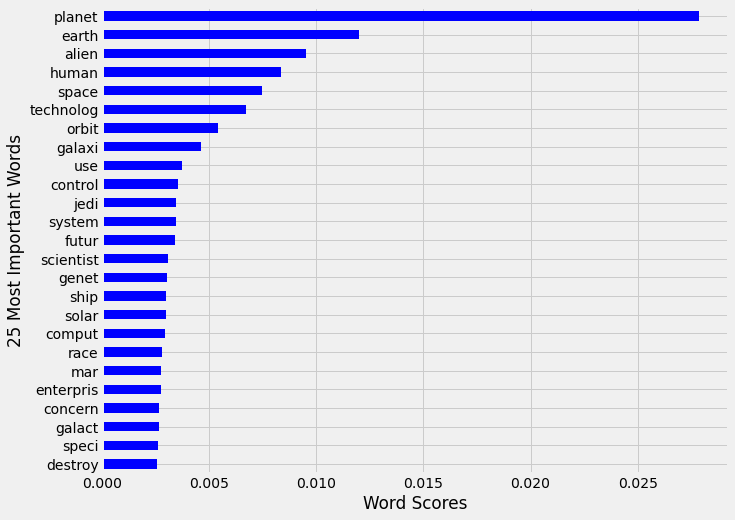

In [17]:
fig, ax = plt.subplots()
feat_scores = pd.Series(rf.feature_importances_, index=tfidf_vec.get_feature_names())
feat_scores = feat_scores.sort_values()
ax = feat_scores[-25:].plot(kind='barh',figsize=(10,8),color='b')
ax.set_ylabel('25 Most Important Words')
ax.set_xlabel('Word Scores')
# fig.savefig('/home/thomas/DSI_ii/cap_stones/DSI_CS3/images/body_scores.png',dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches='tight', pad_inches=0.2,
#         frameon=None, metadata=None)

In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
predictions = rf.predict(X_test_nlp)
cf = pd.crosstab(y_test, predictions)
print(cf)

col_0   False  True 
scifi?              
False    2215     25
True      417    233


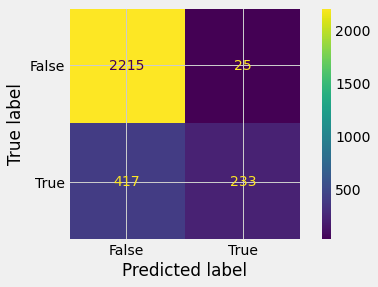

In [19]:
plot_confusion_matrix(rf, X_test_nlp, y_test)

In [20]:
rf.predict(X_test_nlp)

array([False, False, False, ...,  True, False, False])

In [22]:
# mislabeled = X_test[y_test != predictions]
# mislabeled['Summary'].values

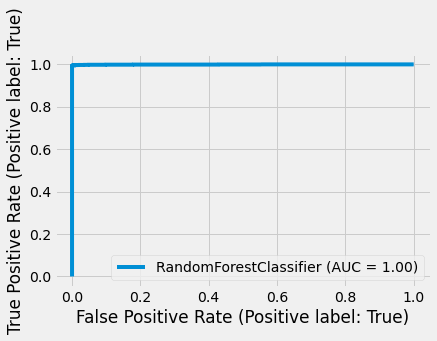

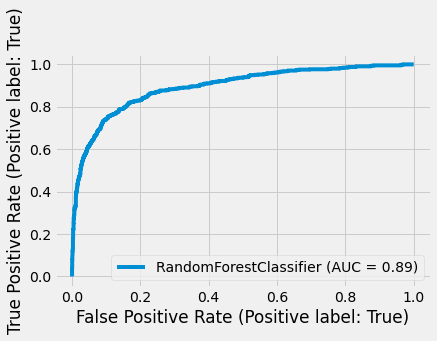

In [23]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,X_train_nlp,y_train)
# plt.savefig('/home/thomas/DSI_ii/cap_stones/DSI_CS2/images/Title_roc_train.png',dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches='tight', pad_inches=0.2,
#         frameon=None, metadata=None)
plot_roc_curve(rf,X_test_nlp,y_test)
# plt.savefig('/home/thomas/DSI_ii/cap_stones/DSI_CS2/images/Title_roc_test.png',dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches='tight', pad_inches=0.2,
#         frameon=None, metadata=None)